# ETAPA 2c — Resultados: Consolidação e Síntese da Análise DiD

**Dissertação:** Inteligência Artificial Generativa e o Mercado de Trabalho Brasileiro: Uma Análise de Exposição Ocupacional e seus Efeitos Distributivos.

**Aluno:** Manoel Brasil Orlandi

---

### Objetivo deste notebook

Organizar as tabelas e figuras geradas no **Notebook 2b** (Análise DiD) para leitura com a orientadora. Inclui: listagem e exibição de todos os resultados e tabelas em `outputs/tables` e `outputs/figures`, gráficos adicionais para ilustrar os achados, **resumo narrativo** e uma **tabela-síntese de achados** com relevância estatística (***/**/*) e destaque em cores para os achados mais relevantes.

**Input:** Arquivos gerados pelo notebook `etapa_2b_analise_did_caged_ilo.ipynb` (pastas `outputs/tables` e `outputs/figures`).

### 1. Configuração do ambiente

Importar bibliotecas, definir caminhos e estilo de gráficos. Caminhos relativos ao diretório `notebook/`.

In [ ]:
# Verificar dependências e instalar apenas o que faltar (rode esta célula primeiro)
import importlib.util
import subprocess
import sys

PACOTES = [
    ("pandas", "pandas"),
    ("numpy", "numpy"),
    ("matplotlib", "matplotlib"),
    ("seaborn", "seaborn"),
]

def ja_instalado(nome_import):
    return importlib.util.find_spec(nome_import) is not None

faltando = [pip for imp, pip in PACOTES if not ja_instalado(imp)]
if faltando:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q"] + faltando)
    print("Instalado:", ", ".join(faltando))
else:
    print("Todas as dependências já estão instaladas.")

Todas as dependências já estão instaladas.


In [ ]:
# Etapa 2c — Configuração
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display, Image

warnings.filterwarnings("ignore", category=FutureWarning)

OUTPUTS_TABLES = Path("outputs/tables")
OUTPUTS_FIGURES = Path("outputs/figures")
OUTPUTS_TABLES.mkdir(parents=True, exist_ok=True)
OUTPUTS_FIGURES.mkdir(parents=True, exist_ok=True)

pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 120)
pd.set_option("display.float_format", lambda x: f"{x:.4f}")

plt.style.use("seaborn-v0_8-paper")
sns.set_palette("Set2")
plt.rcParams.update({"font.size": 11, "axes.titlesize": 13, "axes.labelsize": 12, "figure.dpi": 150})

print("Configuração carregada.")

Configuração carregada.


### 2. Tabelas geradas no etapa_2b

As tabelas abaixo foram salvas em `outputs/tables` pelo notebook etapa_2b. Exibimos cada uma para leitura.

#### 2.1 Balanceamento pré-tratamento

Médias das variáveis no período pré-tratamento: grupo de controle (baixa exposição) vs. grupo de tratamento (alta exposição). *Diff. Normalizada* e indicador de balanceamento (✓ ou ⚠️).

In [ ]:
path = OUTPUTS_TABLES / "balance_table_pre.csv"
if path.exists():
    df = pd.read_csv(path)
    display(df)
else:
    print("Arquivo não encontrado:", path, "- Execute o notebook etapa_2b para gerar as tabelas.")

,Variável,Controle,Tratamento,Diff. Normalizada,Balanceado
0,Admissões (média),2655.3378,3409.8367,0.0601,✓
1,Desligamentos (média),2321.3264,2916.9194,0.0552,✓
2,Saldo (média),334.0114,492.9173,0.0865,✓
3,Salário médio (R$),2738.7651,5388.2059,0.6846,⚠️
4,Idade média,32.7528,31.7992,-0.1723,✓
5,% Mulheres,0.2789,0.4414,0.6965,⚠️
6,% Superior,0.1557,0.4189,1.1501,⚠️
7,Meses,22.5706,21.8550,-0.2187,✓


#### 2.2 Resultados principais DiD

Coeficiente do tratamento (alta exposição à IA) para cada modelo (1: Basic, 2: FE, 3: FE + Controls — principal, 4–6: contínuo e 4d) e outcome. Erros padrão clusterizados por ocupação (CBO 4d). Coluna `stars`: *** p<0.01, ** p<0.05, * p<0.10.

In [ ]:
path = OUTPUTS_TABLES / "did_main_results.csv"
if path.exists():
    df = pd.read_csv(path)
    display(df)
else:
    print("Arquivo não encontrado:", path)

,model,outcome,coef,se,p_value,stars,n_obs,n_clusters
0,Model 1: Basic,ln_admissoes,0.0056,0.0375,0.8807,NaN,32988,NaN
1,Model 2: FE,ln_admissoes,-0.0215,0.0268,0.4235,NaN,32988,NaN
2,Model 3: FE + Controls (MAIN),ln_admissoes,-0.0271,0.0264,0.3046,NaN,32988,NaN
3,Model 4: Continuous (2d),ln_admissoes,0.0090,0.0804,0.9112,NaN,32988,NaN
4,Model 5: FE + Controls (4d),ln_admissoes,-0.0247,0.0266,0.3528,NaN,32988,NaN
...,...,...,...,...,...,...,...,...
103,Model 2: FE,ln_admissoes_negro,-0.0032,0.0274,0.9076,NaN,32988,NaN
104,Model 3: FE + Controls (MAIN),ln_admissoes_negro,-0.0032,0.0272,0.9067,NaN,32988,NaN
105,Model 4: Continuous (2d),ln_admissoes_negro,0.0880,0.0843,0.2970,NaN,32988,NaN
106,Model 5: FE + Controls (4d),ln_admissoes_negro,-0.0132,0.0282,0.6404,NaN,32988,NaN


#### 2.3 Testes de robustez

Efeito DiD sob: cutoff alternativo (top 10%, 25%, mediana), placebo (tratamento em 12/2021), exclusão de ocupações de TI, tendências diferenciais (pré) e crosswalk 4d.

In [ ]:
path = OUTPUTS_TABLES / "robustness_results.csv"
if path.exists():
    df = pd.read_csv(path)
    display(df)
else:
    print("Arquivo não encontrado:", path)

,outcome,test_type,specification,coef,se,p_value,stars
0,ln_admissoes,Alternative Cutoff,Top 20% (MAIN),-0.0266,0.0265,0.3166,NaN
1,ln_desligamentos,Alternative Cutoff,Top 20% (MAIN),0.0190,0.0268,0.4786,NaN
2,saldo,Alternative Cutoff,Top 20% (MAIN),-77.6159,69.6389,0.2655,NaN
3,ln_salario_adm,Alternative Cutoff,Top 20% (MAIN),-0.0631,0.0285,0.0274,**
4,ln_admissoes,Alternative Cutoff,Top 10%,0.0547,0.0345,0.1133,NaN
5,ln_desligamentos,Alternative Cutoff,Top 10%,0.0633,0.0380,0.0958,*
6,saldo,Alternative Cutoff,Top 10%,-173.8931,102.5733,0.0905,*
7,ln_salario_adm,Alternative Cutoff,Top 10%,-0.0438,0.0372,0.2392,NaN
8,ln_admissoes,Alternative Cutoff,Top 25%,-0.0369,0.0239,0.1241,NaN
9,ln_desligamentos,Alternative Cutoff,Top 25%,0.0297,0.0250,0.2351,NaN


#### 2.4 Robustez: cluster por CBO 2d

Resultado do modelo principal (FE + Controls) com erros padrão clusterizados por CBO 2 dígitos em vez de 4d.

In [ ]:
path = OUTPUTS_TABLES / "did_robustez_cbo2d.csv"
if path.exists():
    df = pd.read_csv(path)
    display(df)
else:
    print("Arquivo não encontrado:", path)

,model,outcome,coef,se,p_value,stars,n_obs,n_clusters,vcov
0,FE+Controls (cluster cbo_2d),ln_salario_adm,-0.0631,0.0364,0.0896,*,32988,NaN,cbo_2d


#### 2.5 Teste de tendências paralelas

Para cada outcome: número de coeficientes pré-tratamento no event study, quantos significativos (p<0.05), p-valor do teste conjunto (pré = 0) e status (PARALELAS ou PREOCUPAÇÃO).

In [ ]:
path = OUTPUTS_TABLES / "parallel_trends_test.csv"
if path.exists():
    df = pd.read_csv(path)
    display(df)
else:
    print("Arquivo não encontrado:", path)

,Outcome,N coefs pré,Sig. (p<0.05),p-valor conjunto,Status
0,Log(Admissões),11,0,0.6390,PARALELAS
1,Log(Desligamentos),11,5,0.0000,PREOCUPAÇÃO
2,Saldo Líquido,11,0,0.3960,PARALELAS
3,Log(Salário Admissão Nominal),11,0,0.9850,PARALELAS
4,Log(Salário Real Admissão),11,0,0.9930,PARALELAS
5,% Superior (Admissão),11,0,0.9960,PARALELAS
6,Log(Salário Mulheres),11,0,0.0730,PREOCUPAÇÃO
7,Log(Salário Homens),11,0,0.9580,PARALELAS
8,Log(Salário Jovens),11,0,0.2650,PARALELAS
9,Log(Salário Não-Jovens),11,0,0.6960,PARALELAS


#### 2.6 Heterogeneidade (Triple DiD)

Efeito principal e interação (tratamento × grupo: jovem, feminino, superior, negro) para cada outcome. `interaction_pval` indica se o efeito difere entre grupos.

In [ ]:
path = OUTPUTS_TABLES / "heterogeneity_triple_did.csv"
if path.exists():
    df = pd.read_csv(path)
    display(df)
else:
    print("Arquivo não encontrado:", path)

,outcome,outcome_label,group,main_effect,interaction,interaction_pval
0,ln_admissoes,Log(Admissões),Idade (jovem ≤30),-0.0444,0.0866,0.1545
1,ln_desligamentos,Log(Desligamentos),Idade (jovem ≤30),0.0075,0.0682,0.3731
2,saldo,Saldo Líquido,Idade (jovem ≤30),-7.9403,-356.7984,0.2073
3,ln_salario_adm,Log(Salário Admissão Nominal),Idade (jovem ≤30),-0.0055,-0.3235,0.0007
4,ln_salario_real_adm,Log(Salário Real Admissão),Idade (jovem ≤30),-0.0000,-0.1863,0.0025
5,pct_superior_adm,% Superior (Admissão),Idade (jovem ≤30),0.0138,-0.0205,0.0656
6,ln_salario_mulher,Log(Salário Mulheres),Idade (jovem ≤30),-0.0455,0.0066,0.9369
7,ln_salario_homem,Log(Salário Homens),Idade (jovem ≤30),0.0478,-0.2393,0.0125
8,ln_salario_jovem,Log(Salário Jovens),Idade (jovem ≤30),-0.1268,0.0085,0.9368
9,ln_salario_naojovem,Log(Salário Não-Jovens),Idade (jovem ≤30),-0.0350,0.1236,0.1860


#### 2.7 Event study (coeficientes por período relativo)

Coeficientes do evento (mês relativo ao lançamento do ChatGPT, t = -1 é referência). Abaixo: outcomes principais. Arquivos completos em `outputs/tables/event_study_*.csv`.

In [ ]:
event_study_files = sorted(OUTPUTS_TABLES.glob("event_study_*.csv"))
print("Arquivos event study disponíveis:", [f.name for f in event_study_files])

# Exibir resumo para outcomes principais
principais = ["ln_admissoes", "ln_desligamentos", "saldo", "ln_salario_adm", "ln_salario_real_adm", "ln_salario_jovem"]
for out in principais:
    path = OUTPUTS_TABLES / f"event_study_{out}.csv"
    if path.exists():
        df_es = pd.read_csv(path)
        print(f"\n--- Event study: {out} ---")
        display(df_es.head(15))

Arquivos event study disponíveis: ['event_study_ln_admissoes.csv', 'event_study_ln_admissoes_homem.csv', 'event_study_ln_admissoes_jovem.csv', 'event_study_ln_admissoes_mulher.csv', 'event_study_ln_admissoes_negro.csv', 'event_study_ln_desligamentos.csv', 'event_study_ln_salario_adm.csv', 'event_study_ln_salario_branco.csv', 'event_study_ln_salario_homem.csv', 'event_study_ln_salario_jovem.csv', 'event_study_ln_salario_medio.csv', 'event_study_ln_salario_mulher.csv', 'event_study_ln_salario_naojovem.csv', 'event_study_ln_salario_negro.csv', 'event_study_ln_salario_real_adm.csv', 'event_study_ln_salario_superior.csv', 'event_study_pct_superior_adm.csv', 'event_study_saldo.csv']

--- Event study: ln_admissoes ---


,t,coef,se,p_value,is_reference,is_pre,ci_low,ci_high
0,-12,-0.0038,0.0379,0.9195,False,True,-0.0782,0.0705
1,-11,-0.0087,0.0453,0.8481,False,True,-0.0974,0.0801
2,-10,-0.0429,0.0572,0.4536,False,True,-0.1550,0.0692
3,-9,-0.0502,0.0470,0.2860,False,True,-0.1425,0.0420
4,-8,-0.0075,0.0413,0.8559,False,True,-0.0885,0.0735
5,-7,-0.0445,0.0416,0.2854,False,True,-0.1259,0.0370
6,-6,-0.0433,0.0366,0.2375,False,True,-0.1150,0.0285
7,-5,-0.0527,0.0353,0.1352,False,True,-0.1219,0.0164
8,-4,-0.0594,0.0488,0.2243,False,True,-0.1550,0.0363
9,-3,-0.0269,0.0375,0.4739,False,True,-0.1003,0.0466



--- Event study: ln_desligamentos ---


,t,coef,se,p_value,is_reference,is_pre,ci_low,ci_high
0,-12,0.0392,0.0323,0.2254,False,True,-0.0241,0.1024
1,-11,0.0831,0.0349,0.0176,False,True,0.0147,0.1516
2,-10,0.0369,0.0384,0.3367,False,True,-0.0383,0.1122
3,-9,0.0277,0.0336,0.4101,False,True,-0.0382,0.0936
4,-8,0.0756,0.0336,0.0250,False,True,0.0096,0.1415
5,-7,0.1418,0.0337,0.0000,False,True,0.0756,0.2079
6,-6,0.0813,0.0368,0.0276,False,True,0.0091,0.1535
7,-5,0.0558,0.0378,0.1409,False,True,-0.0184,0.1299
8,-4,0.0301,0.0338,0.3732,False,True,-0.0362,0.0964
9,-3,0.0741,0.0326,0.0233,False,True,0.0102,0.1379



--- Event study: saldo ---


,t,coef,se,p_value,is_reference,is_pre,ci_low,ci_high
0,-12,-194.3597,266.2103,0.4656,False,True,-716.1319,327.4125
1,-11,-349.4580,428.8335,0.4154,False,True,-1189.9717,491.0557
2,-10,-193.2848,399.0517,0.6283,False,True,-975.4261,588.8565
3,-9,-238.6669,337.6622,0.4799,False,True,-900.4847,423.1510
4,-8,-269.3918,307.8041,0.3818,False,True,-872.6878,333.9042
5,-7,-383.5216,260.0247,0.1407,False,True,-893.1701,126.1268
6,-6,-301.7401,246.3585,0.2211,False,True,-784.6027,181.1226
7,-5,-439.4320,273.1858,0.1082,False,True,-974.8762,96.0121
8,-4,-321.2117,301.2095,0.2866,False,True,-911.5823,269.1589
9,-3,-252.9877,258.9379,0.3289,False,True,-760.5061,254.5306



--- Event study: ln_salario_adm ---


,t,coef,se,p_value,is_reference,is_pre,ci_low,ci_high
0,-12,0.0123,0.0761,0.8720,False,True,-0.1369,0.1614
1,-11,0.0106,0.0824,0.8979,False,True,-0.1509,0.1721
2,-10,0.0651,0.1076,0.5458,False,True,-0.1459,0.2760
3,-9,-0.0083,0.0839,0.9211,False,True,-0.1728,0.1562
4,-8,-0.0567,0.0968,0.5579,False,True,-0.2464,0.1329
5,-7,-0.0418,0.0977,0.6687,False,True,-0.2334,0.1497
6,-6,0.0376,0.0975,0.6996,False,True,-0.1535,0.2288
7,-5,-0.0402,0.1043,0.7003,False,True,-0.2446,0.1643
8,-4,0.1292,0.0980,0.1878,False,True,-0.0629,0.3213
9,-3,-0.0194,0.0925,0.8337,False,True,-0.2007,0.1619



--- Event study: ln_salario_real_adm ---


,t,coef,se,p_value,is_reference,is_pre,ci_low,ci_high
0,-12,-0.0156,0.0514,0.7614,False,True,-0.1164,0.0852
1,-11,-0.0180,0.0580,0.7558,False,True,-0.1316,0.0956
2,-10,0.0157,0.0770,0.8382,False,True,-0.1351,0.1666
3,-9,-0.0259,0.0578,0.6541,False,True,-0.1393,0.0874
4,-8,-0.0285,0.0654,0.6633,False,True,-0.1567,0.0997
5,-7,-0.0262,0.0663,0.6926,False,True,-0.1562,0.1038
6,-6,-0.0001,0.0660,0.9982,False,True,-0.1294,0.1291
7,-5,-0.0248,0.0710,0.7266,False,True,-0.1640,0.1143
8,-4,0.0878,0.0682,0.1981,False,True,-0.0458,0.2214
9,-3,-0.0144,0.0651,0.8249,False,True,-0.1421,0.1132



--- Event study: ln_salario_jovem ---


,t,coef,se,p_value,is_reference,is_pre,ci_low,ci_high
0,-12,0.2473,0.1603,0.1235,False,True,-0.0669,0.5616
1,-11,0.1104,0.1531,0.4712,False,True,-0.1896,0.4104
2,-10,0.2639,0.1710,0.1233,False,True,-0.0713,0.5990
3,-9,0.0516,0.1552,0.7398,False,True,-0.2526,0.3558
4,-8,0.1100,0.1897,0.5622,False,True,-0.2618,0.4818
5,-7,0.0971,0.2055,0.6366,False,True,-0.3056,0.4999
6,-6,0.2559,0.1939,0.1873,False,True,-0.1240,0.6359
7,-5,0.2109,0.1664,0.2054,False,True,-0.1152,0.5369
8,-4,0.3670,0.1889,0.0526,False,True,-0.0034,0.7373
9,-3,0.0886,0.1847,0.6314,False,True,-0.2734,0.4506


### 3. Figuras geradas no etapa_2b

Figuras salvas em `outputs/figures` pelo notebook etapa_2b (tendências paralelas, event study agregado, scatter exposição vs coeficiente). Se a pasta estiver vazia, execute o notebook etapa_2b para gerá-las.

--- event_study_all_outcomes.png ---


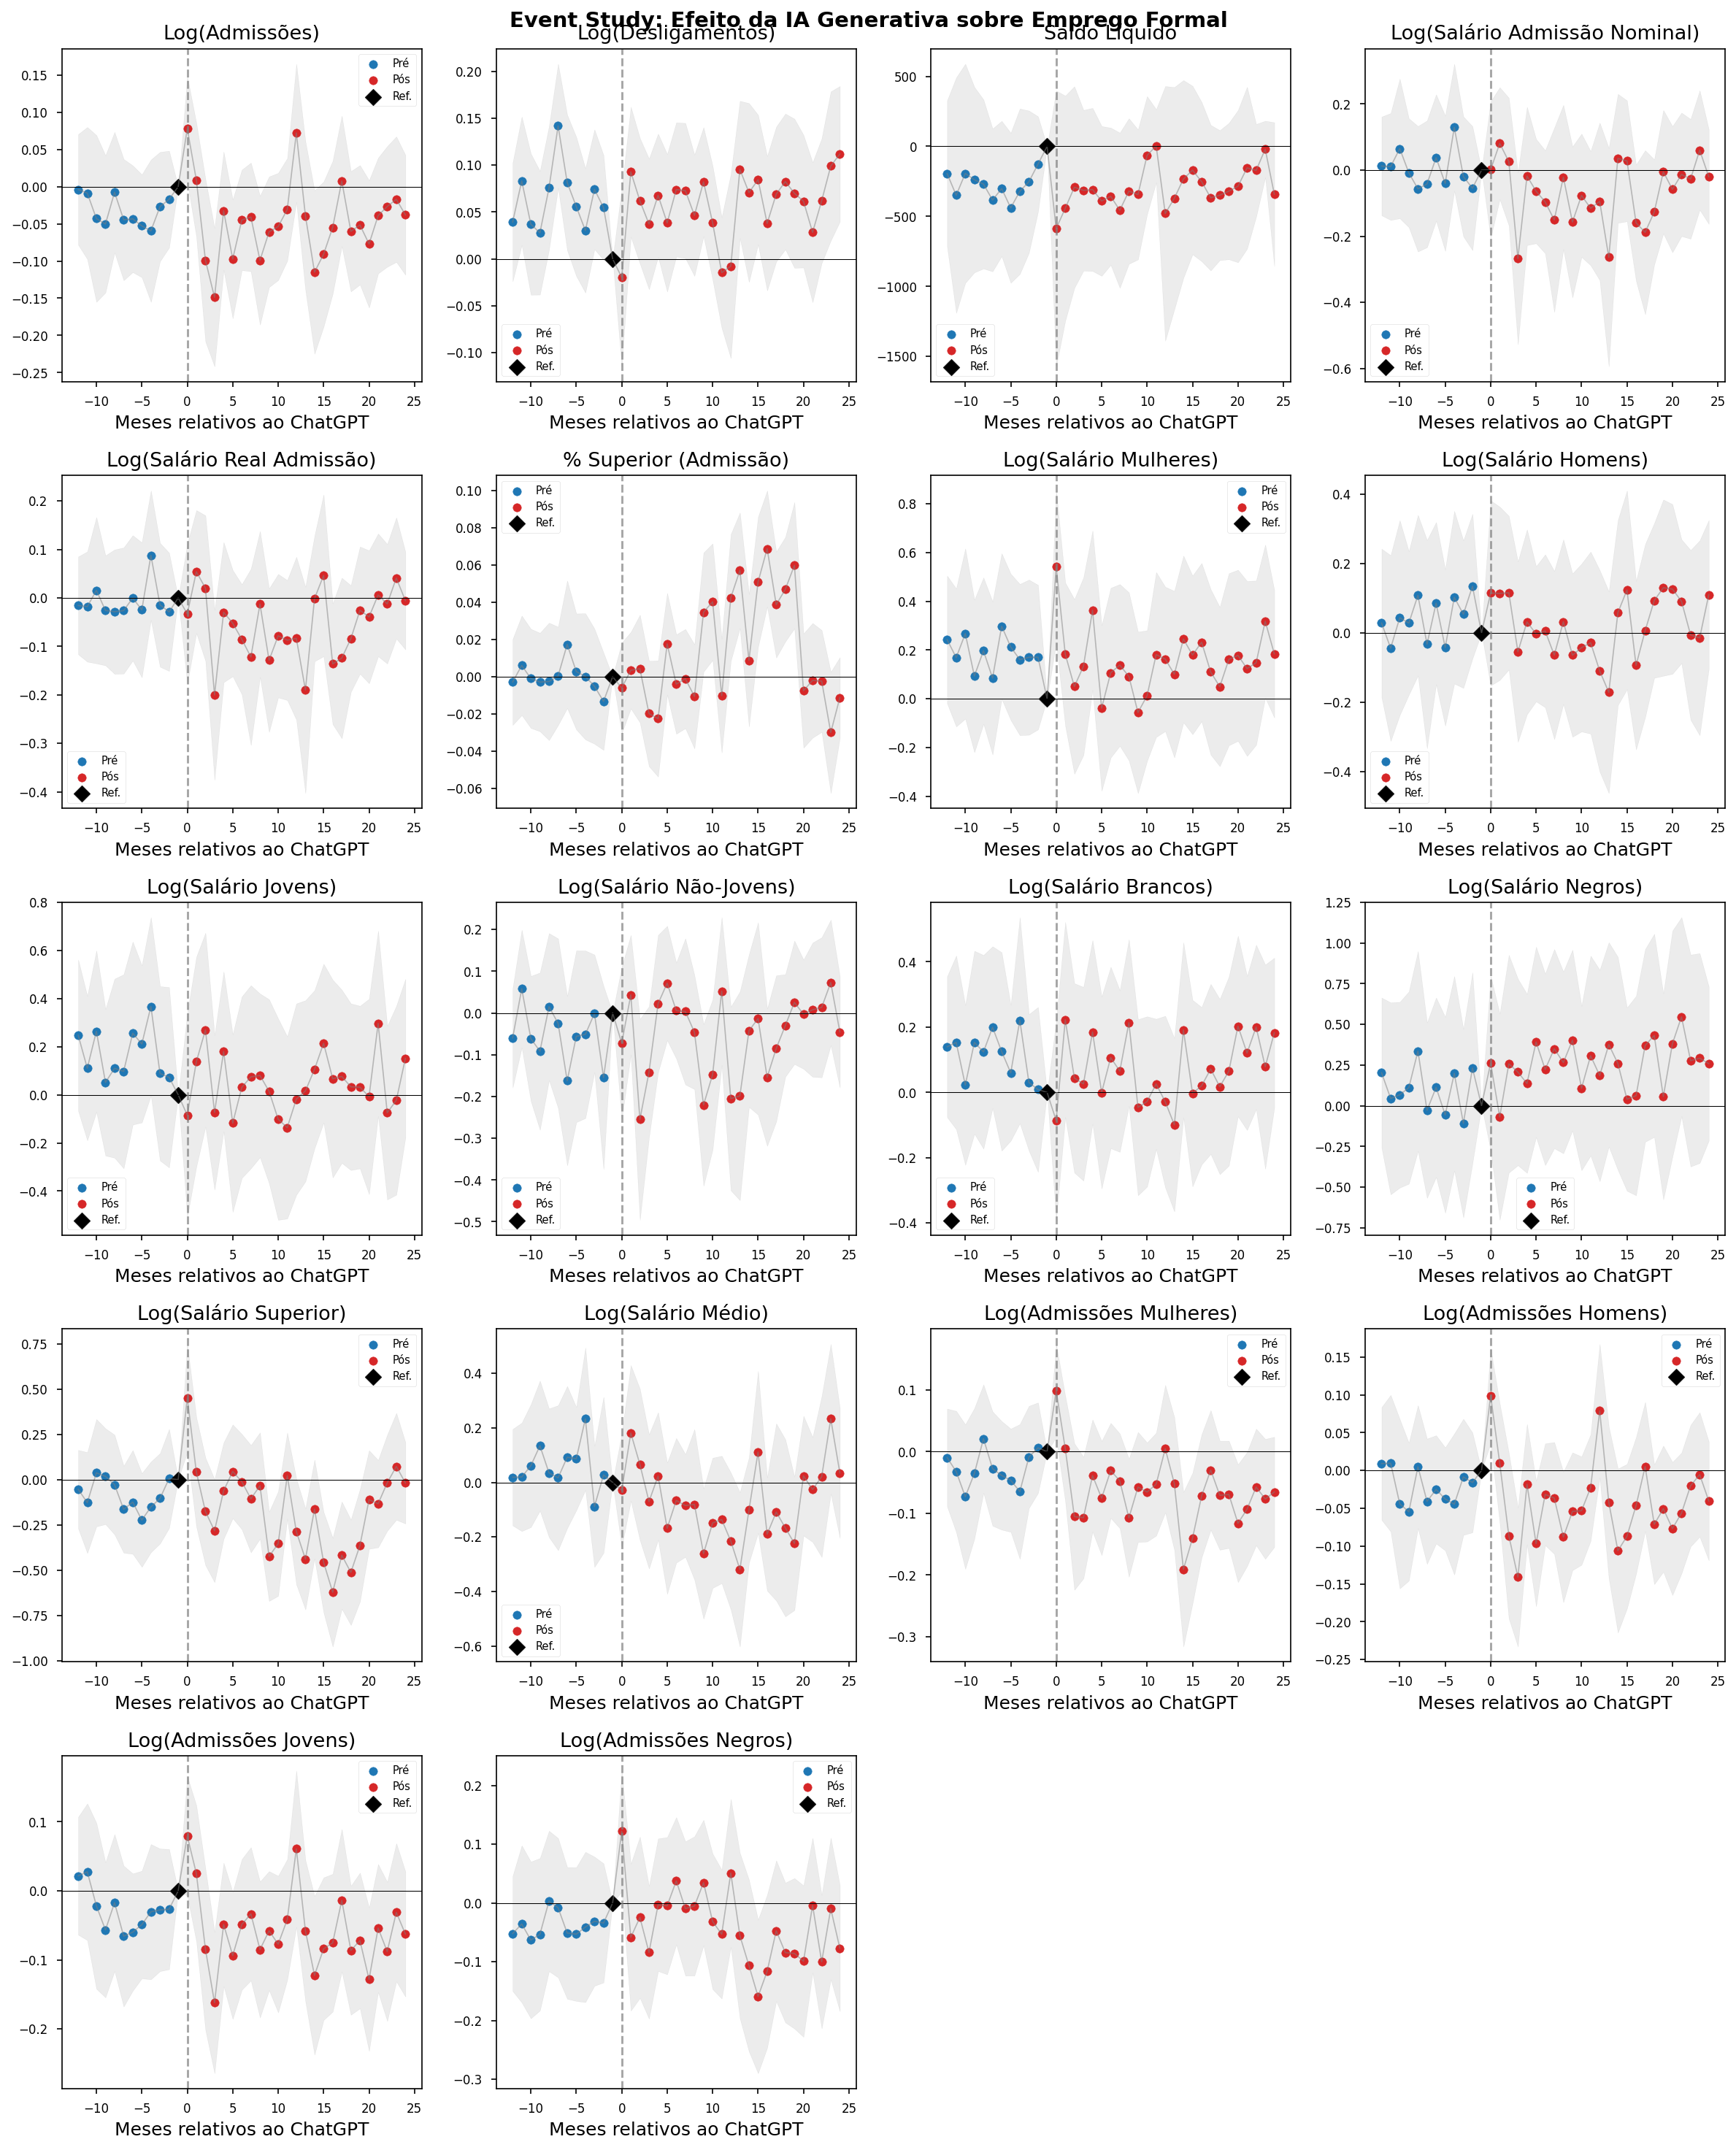

--- parallel_trends_all_outcomes.png ---


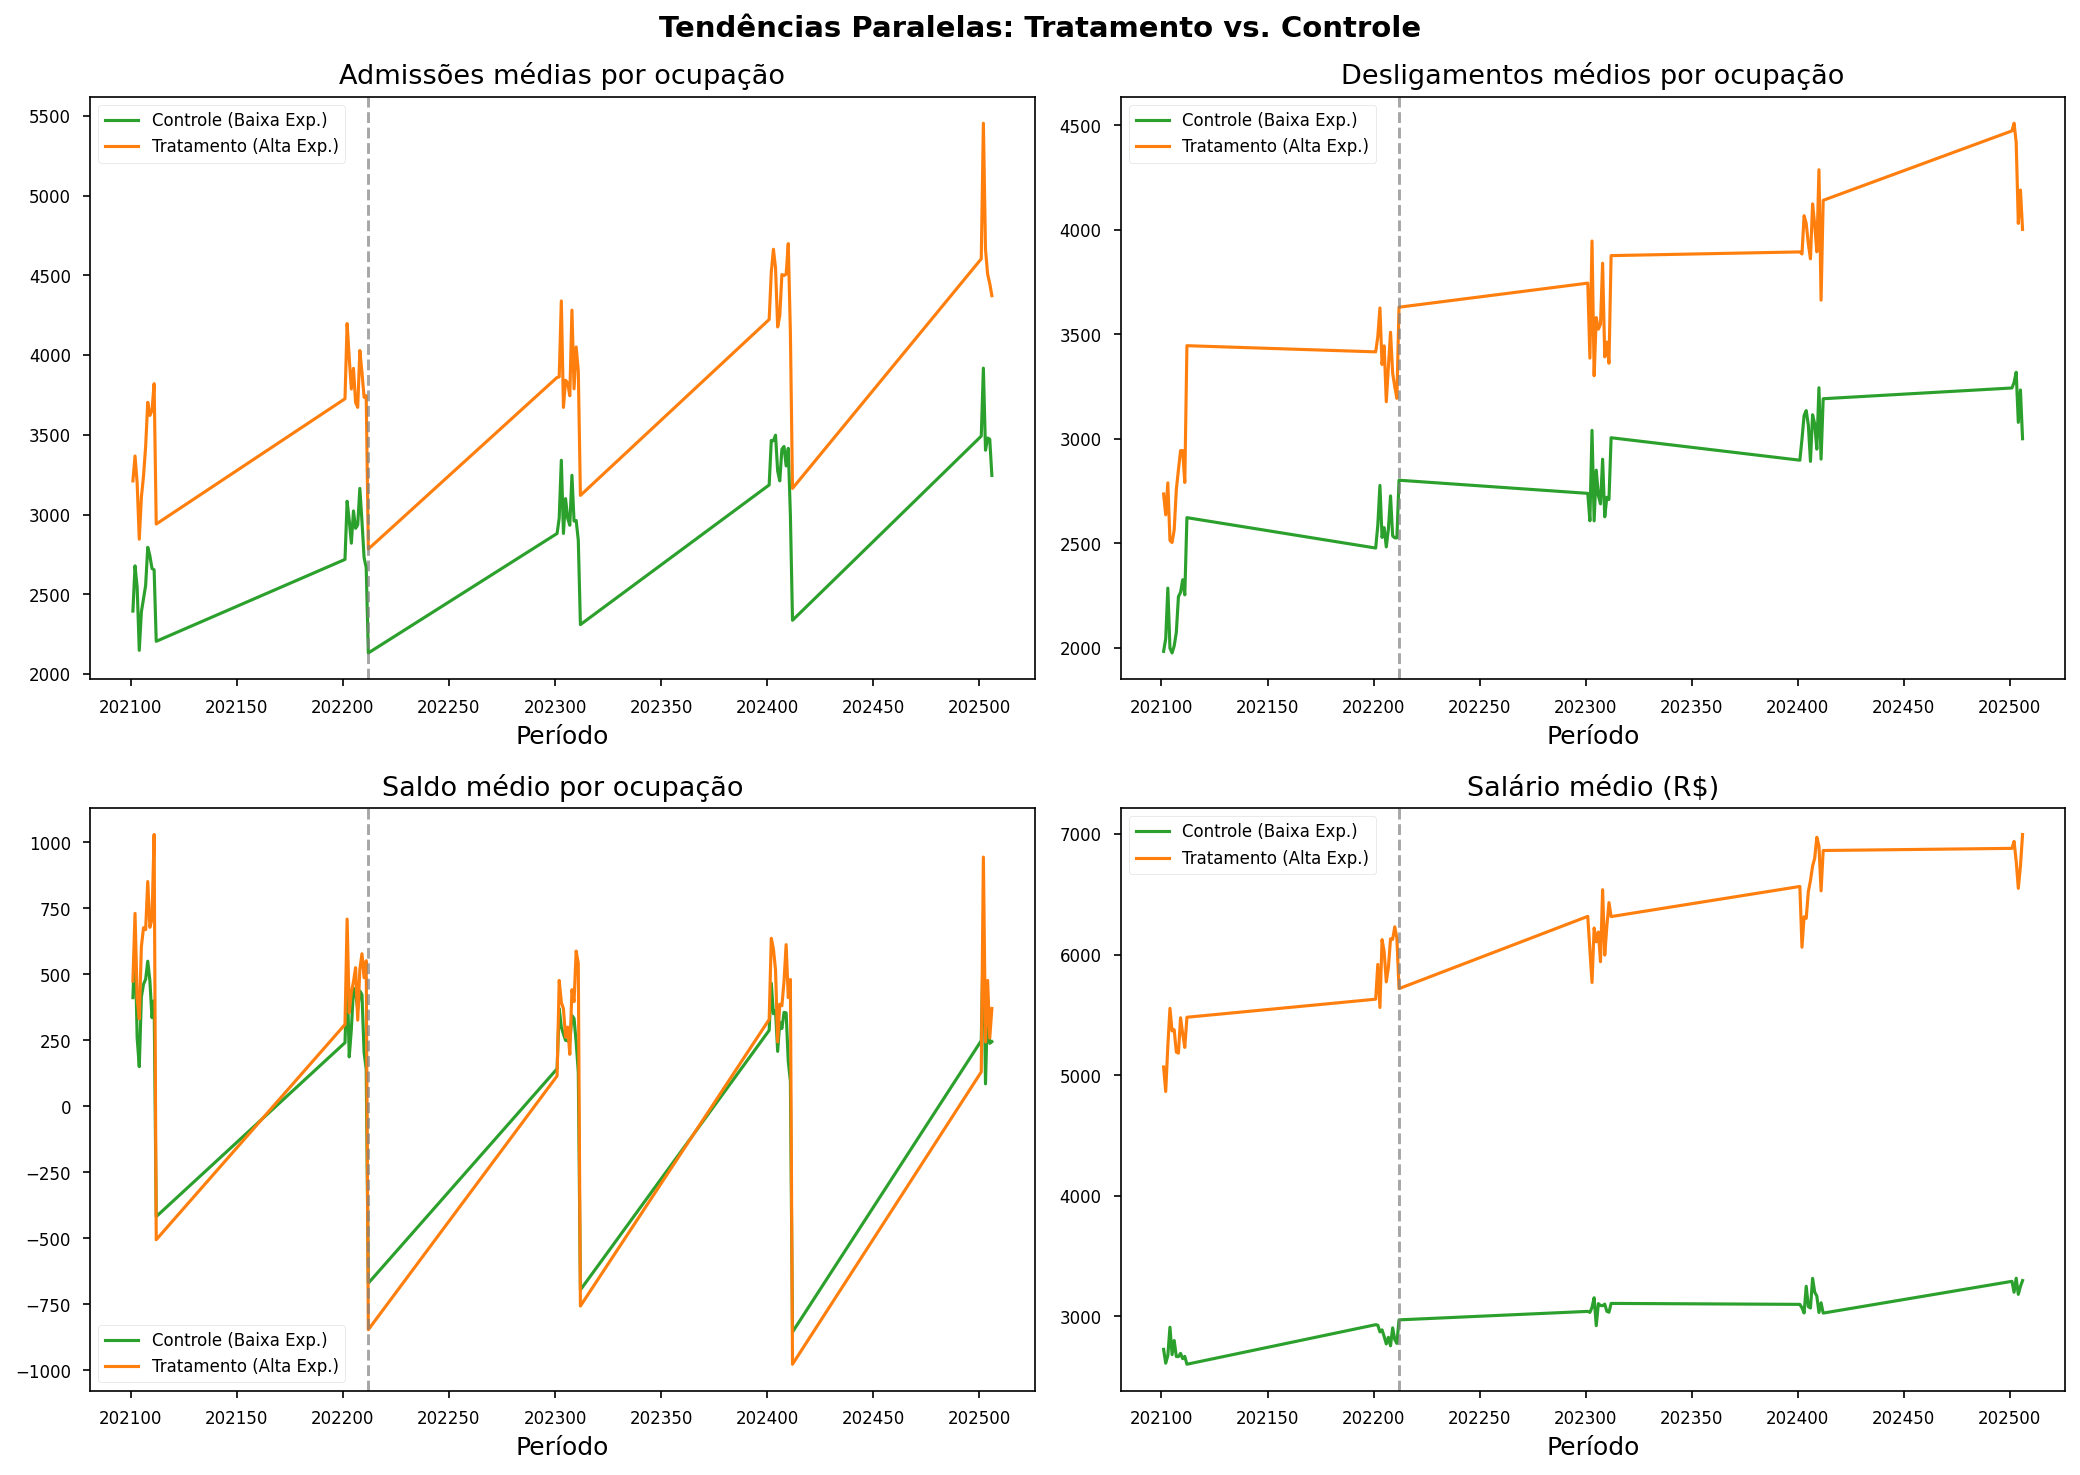

--- scatter_automation_index_vs_did_coef.png ---


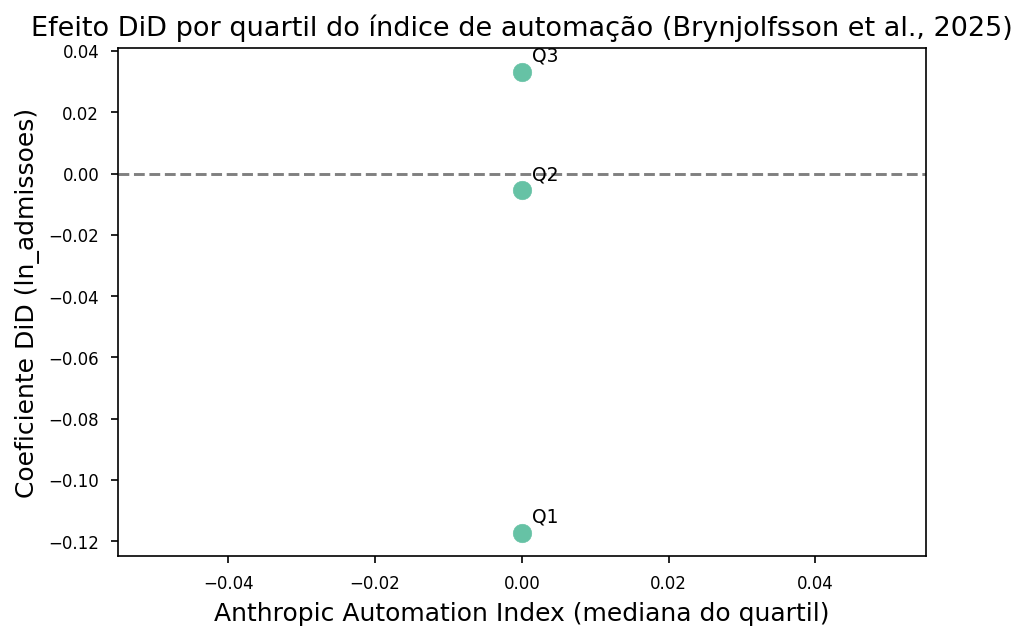

In [ ]:
figuras = sorted(OUTPUTS_FIGURES.glob("*.png")) + sorted(OUTPUTS_FIGURES.glob("*.pdf"))
if not figuras:
    print("Nenhuma figura encontrada em", OUTPUTS_FIGURES)
    print("Execute o notebook etapa_2b_analise_did_caged_ilo.ipynb para gerar as figuras.")
else:
    for path in figuras:
        print("---", path.name, "---")
        if path.suffix.lower() == ".png":
            display(Image(filename=str(path)))
        else:
            print("(PDF: abra manualmente ou use outro viewer)")

### 4. Gráficos para ilustrar os achados

Gráficos construídos neste notebook a partir das tabelas do etapa_2b: efeito DiD nos outcomes principais (Model 3) e dinâmica do event study para um outcome emblemático.

#### 4.1 Efeito DiD (alta exposição à IA) nos outcomes principais

Coeficiente do tratamento para o modelo principal (Model 3: FE + Controls). Barras: intervalo de confiança 95%. Cores: verde = p&lt;0.01, laranja = p&lt;0.05, cinza = não significativo.

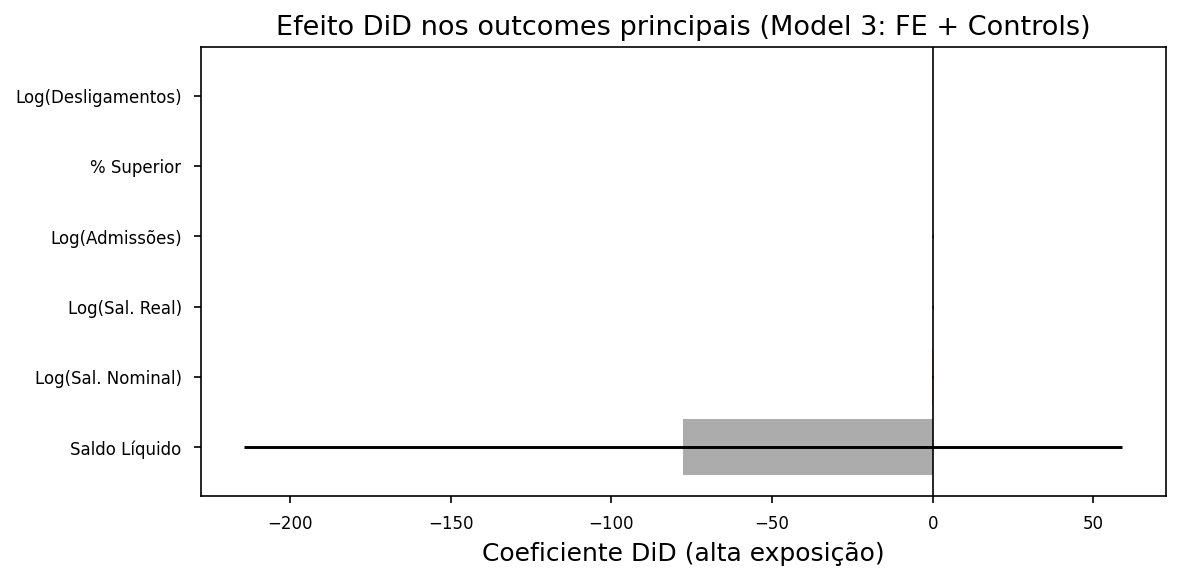

In [ ]:
path = OUTPUTS_TABLES / "did_main_results.csv"
if not path.exists():
    print("Arquivo não encontrado. Execute o etapa_2b.")
else:
    df = pd.read_csv(path)
    main = df[df["model"] == "Model 3: FE + Controls (MAIN)"].copy()
    outcomes_principais = ["ln_admissoes", "ln_desligamentos", "saldo", "ln_salario_adm", "ln_salario_real_adm", "pct_superior_adm"]
    main = main[main["outcome"].isin(outcomes_principais)]
    labels = {
        "ln_admissoes": "Log(Admissões)", "ln_desligamentos": "Log(Desligamentos)", "saldo": "Saldo Líquido",
        "ln_salario_adm": "Log(Sal. Nominal)", "ln_salario_real_adm": "Log(Sal. Real)", "pct_superior_adm": "% Superior"
    }
    main["label"] = main["outcome"].map(labels)
    main["ci_lo"] = main["coef"] - 1.96 * main["se"]
    main["ci_hi"] = main["coef"] + 1.96 * main["se"]
    main["cor"] = main["p_value"].apply(lambda p: "#2e7d32" if p < 0.01 else "#ef6c00" if p < 0.05 else "#9e9e9e")
    main = main.sort_values("coef", ascending=True)
    fig, ax = plt.subplots(figsize=(8, 4))
    y_pos = range(len(main))
    ax.barh(y_pos, main["coef"], color=main["cor"], alpha=0.85)
    ax.errorbar(main["coef"], y_pos, xerr=1.96 * main["se"], fmt="none", color="black", capsize=3)
    ax.axvline(0, color="black", linewidth=0.8)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(main["label"])
    ax.set_xlabel("Coeficiente DiD (alta exposição)")
    ax.set_title("Efeito DiD nos outcomes principais (Model 3: FE + Controls)")
    plt.tight_layout()
    plt.show()

#### 4.2 Dinâmica do efeito: Event study (salário real de admissão)

Coeficientes por mês relativo ao lançamento do ChatGPT (t = -1 é referência). Banda: IC 95%. Permite verificar tendências pré e evolução pós-tratamento.

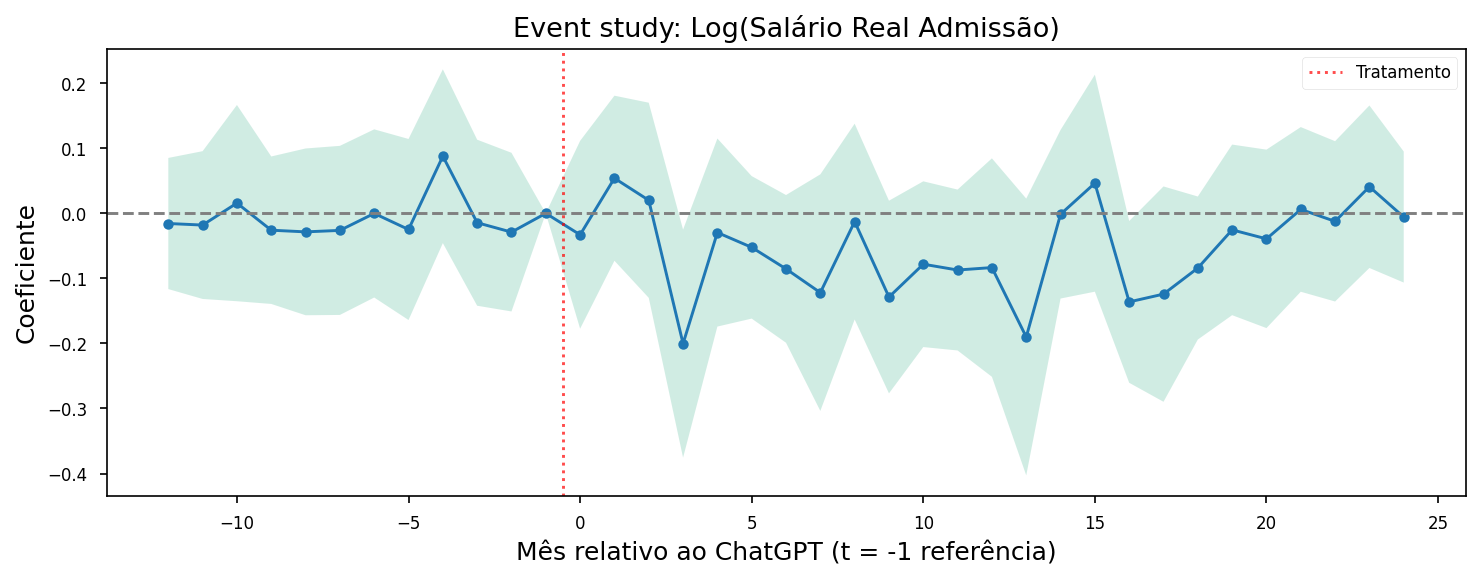

In [ ]:
path = OUTPUTS_TABLES / "event_study_ln_salario_real_adm.csv"
if not path.exists():
    path = OUTPUTS_TABLES / "event_study_ln_salario_jovem.csv"
if path.exists():
    df_es = pd.read_csv(path)
    df_es = df_es.sort_values("t")
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(df_es["t"], df_es["coef"], marker="o", markersize=5, color="#1f77b4")
    ax.fill_between(df_es["t"], df_es["ci_low"], df_es["ci_high"], alpha=0.3)
    ax.axhline(0, color="gray", linestyle="--")
    ax.axvline(-0.5, color="red", linestyle=":", alpha=0.7, label="Tratamento")
    ax.set_xlabel("Mês relativo ao ChatGPT (t = -1 referência)")
    ax.set_ylabel("Coeficiente")
    ax.set_title("Event study: " + ("Log(Salário Real Admissão)" if "real" in path.name else "Log(Salário Jovens)"))
    ax.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Nenhum event_study_*.csv encontrado. Execute o etapa_2b.")

#### 4.3 Tabela visual de significância (outcomes principais × modelo principal)

Heatmap: célula escura = significativo (***/**/*), clara = não significativo. Facilita ver onde os efeitos são robustos.

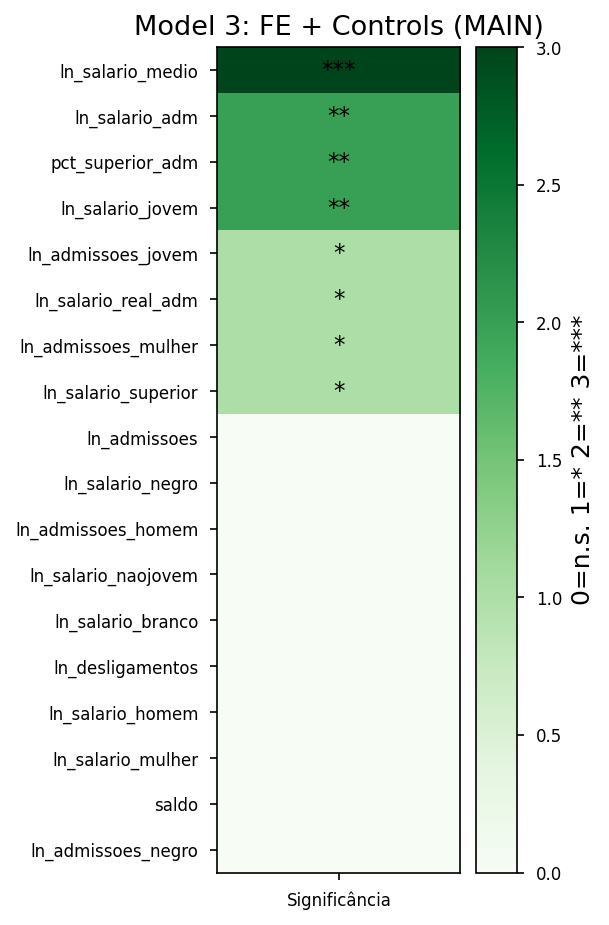

In [ ]:
path = OUTPUTS_TABLES / "did_main_results.csv"
if path.exists():
    df = pd.read_csv(path)
    main3 = df[df["model"] == "Model 3: FE + Controls (MAIN)"].copy()
    main3["sig"] = main3["p_value"].apply(lambda p: 3 if p < 0.01 else 2 if p < 0.05 else 1 if p < 0.10 else 0)
    pivot = main3.set_index("outcome")["sig"].to_frame("estrelas")
    pivot = pivot.sort_values("estrelas", ascending=False)
    fig, ax = plt.subplots(figsize=(4, max(5, len(pivot) * 0.35)))
    cmap = plt.cm.Greens
    im = ax.imshow(pivot.values, cmap=cmap, vmin=0, vmax=3, aspect="auto")
    ax.set_yticks(range(len(pivot)))
    ax.set_yticklabels(pivot.index)
    ax.set_xticks([0])
    ax.set_xticklabels(["Significância"])
    for i in range(len(pivot)):
        ax.text(0, i, "***" if pivot.iloc[i, 0] == 3 else "**" if pivot.iloc[i, 0] == 2 else "*" if pivot.iloc[i, 0] == 1 else "", ha="center", va="center")
    plt.colorbar(im, ax=ax, label="0=n.s. 1=* 2=** 3=***")
    ax.set_title("Model 3: FE + Controls (MAIN)")
    plt.tight_layout()
    plt.show()
else:
    print("Arquivo não encontrado.")

### 5. Resumo dos achados

**Tendências paralelas:** O teste de tendências paralelas (coeficientes pré-tratamento do event study) indica que a maioria dos outcomes apresenta tendências paralelas entre grupos de alta e baixa exposição no período pré-ChatGPT. Há sinal de preocupação em **Log(Desligamentos)** e **Log(Salário Mulheres)** (p-valor conjunto pré baixo ou coeficientes pré significativos), o que deve ser considerado na interpretação.

**Efeitos principais (Model 3: FE + Controls):** Após o lançamento do ChatGPT, ocupações com **alta exposição à IA** apresentam, em média: (i) **redução no salário de admissão nominal** (coef. negativo, **); (ii) **redução no salário real de admissão** (*); (iii) **aumento na proporção de admissões com ensino superior** (**); (iv) **redução no salário de admissão dos jovens** (**) e **redução no salário médio** (***). Não há efeito estatisticamente significativo em admissões ou desligamentos em nível; o saldo líquido é negativo em algumas especificações (ex. contínuo 4d) com * ou **.

**Robustez:** Os resultados de salário permanecem ao usar cutoff alternativo (top 10%, 25%), placebo em 12/2021 (não significativo), exclusão de ocupações de TI (efeito em salário nominal **) e crosswalk 4d. O teste de tendências diferenciais (pré) não rejeita a hipótese de paralelismo.

**Heterogeneidade:** A interação tratamento × **jovem** é forte para salários (salário nominal, real, jovem, não-jovem, negro, salário médio) e para % superior, sugerindo que **jovens em ocupações de alta exposição** sofrem mais o efeito negativo nos salários. Há heterogeneidade por gênero (salário jovem) e por raça (salário negro).

Em conjunto, os achados sugerem que a difusão da IA generativa está associada a **piora nos salários de admissão** em ocupações mais expostas, em especial para **jovens** e para cargos de **escolaridade média**, com **aumento da share de admissões com ensino superior** nessas ocupações — compatível com substituição de tarefas ou mudança na composição da demanda.

### 6. Tabela-síntese de achados e relevância estatística

Tabela única com os principais achados: descrição, coeficiente, E.P., p-valor, significância (*** p&lt;0.01, ** p&lt;0.05, * p&lt;0.10) e tipo (Principal, Robustez, Heterogeneidade). **Cores:** verde = achados mais relevantes (*** ou **); âmbar = * ou relevante; neutro = não significativo.

In [ ]:
# Construir tabela-síntese a partir dos CSVs
def stars(p):
    if p is None or pd.isna(p): return ""
    if p < 0.01: return "***"
    if p < 0.05: return "**"
    if p < 0.10: return "*"
    return ""

rows = []
# Model 3 principal
path_main = OUTPUTS_TABLES / "did_main_results.csv"
if path_main.exists():
    df_main = pd.read_csv(path_main)
    m3 = df_main[df_main["model"] == "Model 3: FE + Controls (MAIN)"]
    outcome_labels = {
        "ln_admissoes": "Log(Admissões)", "ln_desligamentos": "Log(Desligamentos)", "saldo": "Saldo Líquido",
        "ln_salario_adm": "Log(Sal. Nominal)", "ln_salario_real_adm": "Log(Sal. Real)", "pct_superior_adm": "% Superior",
        "ln_salario_jovem": "Log(Sal. Jovens)", "ln_salario_medio": "Log(Sal. Médio)", "ln_salario_superior": "Log(Sal. Superior)",
        "ln_salario_mulher": "Log(Sal. Mulheres)", "ln_salario_naojovem": "Log(Sal. Não-Jovens)", "ln_admissoes_mulher": "Log(Adm. Mulheres)",
        "ln_admissoes_jovem": "Log(Adm. Jovens)"
    }
    for _, r in m3.iterrows():
        out = r["outcome"]
        label = outcome_labels.get(out, out)
        s = stars(r["p_value"])
        rows.append({
            "Achado": f"Efeito DiD (alta exp.) em {label}",
            "Outcome": label,
            "Coeficiente": round(r["coef"], 4),
            "E.P.": round(r["se"], 4),
            "p-valor": round(r["p_value"], 4),
            "Sig.": s if s else "—",
            "Tipo": "Principal"
        })

# Robustez (linhas selecionadas: Top 20% e Placebo e Excl. TI)
path_rob = OUTPUTS_TABLES / "robustness_results.csv"
if path_rob.exists():
    df_rob = pd.read_csv(path_rob)
    for spec in ["Top 20% (MAIN)", "Placebo (12/2021)", "Sem ocupações TI", "Score 4d (fallback hierárquico 6 níveis)"]:
        sub = df_rob[df_rob["specification"] == spec]
        for _, r in sub.iterrows():
            s = stars(r["p_value"])
            rows.append({
                "Achado": f"Robustez: {spec} — {r['outcome']}",
                "Outcome": r["outcome"],
                "Coeficiente": round(r["coef"], 4),
                "E.P.": round(r["se"], 4),
                "p-valor": round(r["p_value"], 4),
                "Sig.": s if s else "—",
                "Tipo": "Robustez"
            })

sintese = pd.DataFrame(rows)
if sintese.empty:
    print("Nenhum dado encontrado. Execute o etapa_2b.")
else:
    # Relevância para cor: 2 = mais relevante (***/**), 1 = * ou robustez relevante, 0 = não sig.
    sintese.to_csv(OUTPUTS_TABLES / "sintese_achados_etapa2c.csv", index=False)
    # Estilo: verde para ***/**, âmbar para *, neutro para não sig.
    def highlight_relevancia(row):
        p = row["p-valor"]
        r = 2 if p < 0.05 else (1 if p < 0.10 else 0)
        if r == 2: return ["background-color: #c8e6c9"] * len(row)
        if r == 1: return ["background-color: #fff9c4"] * len(row)
        return [""] * len(row)
    styled = sintese.style.apply(highlight_relevancia, axis=1).set_caption("Síntese dos achados (verde = ***/**, âmbar = *)")
    display(styled)

,Achado,Outcome,Coeficiente,E.P.,p-valor,Sig.,Tipo
0,Efeito DiD (alta exp.) em Log(Admissões),Log(Admissões),-0.027100,0.026400,0.304600,—,Principal
1,Efeito DiD (alta exp.) em Log(Desligamentos),Log(Desligamentos),0.019000,0.026800,0.478900,—,Principal
2,Efeito DiD (alta exp.) em Saldo Líquido,Saldo Líquido,-77.674700,69.625500,0.265000,—,Principal
3,Efeito DiD (alta exp.) em Log(Sal. Nominal),Log(Sal. Nominal),-0.065600,0.027800,0.018500,**,Principal
4,Efeito DiD (alta exp.) em Log(Sal. Real),Log(Sal. Real),-0.034100,0.019300,0.078000,*,Principal
5,Efeito DiD (alta exp.) em % Superior,% Superior,0.010300,0.004300,0.016400,**,Principal
6,Efeito DiD (alta exp.) em Log(Sal. Mulheres),Log(Sal. Mulheres),-0.044500,0.036200,0.219100,—,Principal
7,Efeito DiD (alta exp.) em ln_salario_homem,ln_salario_homem,0.003900,0.027000,0.885400,—,Principal
8,Efeito DiD (alta exp.) em Log(Sal. Jovens),Log(Sal. Jovens),-0.133700,0.052200,0.010600,**,Principal
9,Efeito DiD (alta exp.) em Log(Sal. Não-Jovens),Log(Sal. Não-Jovens),0.002500,0.027500,0.927700,—,Principal


### 7. Nota sobre reprodução

Todos os inputs deste notebook (tabelas em `outputs/tables` e figuras em `outputs/figures`) são gerados pelo **notebook etapa_2b_analise_did_caged_ilo.ipynb**. Para reproduzir os resultados do zero, execute primeiro o **etapa_2a_preparacao_dados_did_caged_ilo.ipynb** (preparação do painel) e em seguida o **etapa_2b** (análise DiD). Depois, execute este notebook (etapa_2c) para consolidar e visualizar os achados.